In [63]:
import csv
import pandas as pd
import mysql.connector
import numpy as np
import fonction as f
import seaborn as sns

data = pd.read_sql

sql_conn =  mysql.connector.connect(host='213.190.6.22', database='u485051925_tecog', user='u485051925_cogueur',  password='Josiana34')
#sql_conn =  mysql.connector.connect(host='localhost', database='te_cog', user='root',  password='')
query = "SELECT * FROM digit"
data = pd.read_sql(query, sql_conn)

df = data.set_index(['id_sujet', 'trial', 'item'])
df.to_csv('data.csv')
df

correct key_press correct_response       rt  \
id_sujet trial item                                                
30       1     1           1         2                2  425.170   
               2           1         9                9  135.260   
               3           1         5                5  173.410   
         2     1           1         4                4  648.540   
               2           1         1                1  728.415   
...                      ...       ...              ...      ...   
33       14    4           0         5                3  671.380   
               5           0         6                4  545.265   
               6           0         8                6  797.235   
               7           1         1                1  737.350   
               8           0         3                2  680.210   

                     time_elapsed   test_part  
id_sujet trial item                            
30       1     1           124134   trial_1_1  
               2           124270   trial_1_2  
               3           124444   trial_1_3  
         2     1           130598   trial_2_1  
               2           131327   trial_2_2  
...                           ...         ...  
33       14    4           207359  trial_14_4  
               5           207909  trial_14_5  
               6           208710  trial_14_6  
               7           209452  trial_14_7  
               8           210137  trial_14_8  

[376 rows x 6 columns]

In [64]:
query = "SELECT * FROM sujets"
sujets = pd.read_sql(query, sql_conn)
sujets

,id_sujet,code_sujet
0,30,test
1,31,test
2,32,test
3,33,test


In [65]:
scores = []
index = []
for i in sujets['id_sujet']:
    scores.append(f.scoring(df.xs(i)))
    index.append(i)

result = pd.DataFrame(scores, index=index)
result = result.transpose()
result.sum()

30    3
31    3
32    3
33    2
dtype: int64

In [96]:
rt = df.groupby(level=1).mean()
rt

,correct,rt,time_elapsed
trial,,,
1,1.000000,314.095833,95781.500000
2,1.000000,651.600937,103287.437500
3,0.800000,784.354250,113272.300000
4,0.291667,287.552708,123143.625000
5,0.214286,305.464821,133632.892857
6,0.035714,321.271964,144401.321429
7,0.041667,416.982708,154352.416667
8,0.035714,563.632500,167198.607143
9,0.035714,378.221964,178118.392857


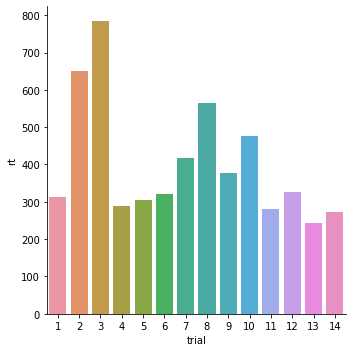

In [103]:
sns.catplot(x="trial", y="rt", kind="bar", data=rt.reset_index())

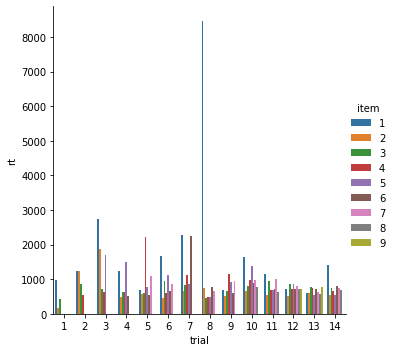

In [90]:
sns.catplot(x="trial", y="rt", hue="item", kind="bar", data=df.xs(33).reset_index())